In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)

# Evolution Charts

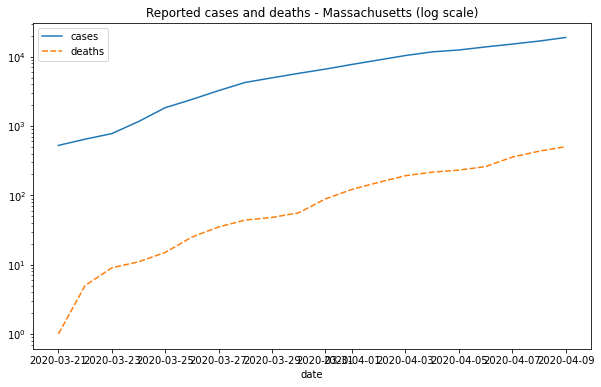

In [3]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df)
ax.set_yscale("log")

plt.title("Reported cases and deaths - Massachusetts (log scale)")

plt.show()

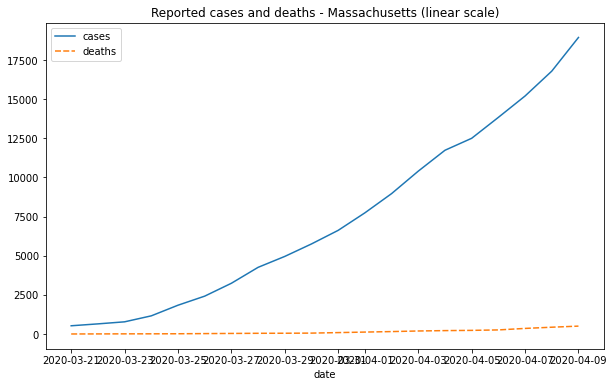

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df)
ax.set_yscale("linear")

plt.title("Reported cases and deaths - Massachusetts (linear scale)")

plt.show()

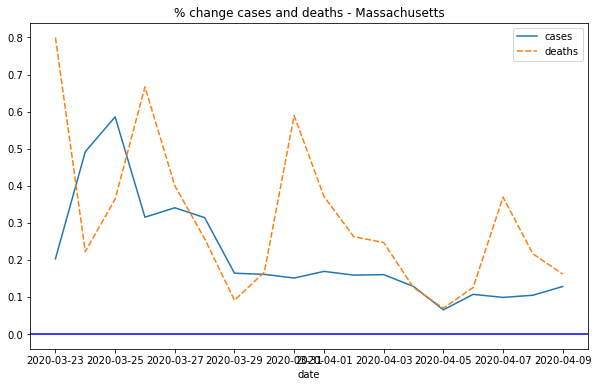

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df.pct_change().iloc[2:])
ax.set_yscale("linear")
plt.axhline(0, c="blue")

plt.title("% change cases and deaths - Massachusetts")

plt.show()

   # Data for the past 3 days

In [6]:
df[-3:]

,cases,deaths
date,,
2020-04-07,15202,356
2020-04-08,16790,433
2020-04-09,18941,503


In [7]:
df.pct_change().iloc[-3:]

,cases,deaths
date,,
2020-04-07,0.098649,0.369231
2020-04-08,0.104460,0.216292
2020-04-09,0.128112,0.161663
